## Project Description

### Dataset

- **File**: `World_Dataset_After_preprossing.csv`
- **Description**: The dataset contains historical CO2 emission values along with corresponding dates. The dataset has been preprocessed to include additional features such as the quarter, month, year, and a binary feature indicating the COVID-19 period.

### Libraries Used

- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical operations.
- `matplotlib` and `seaborn`: For data visualization.
- `scikit-learn`: For machine learning algorithms and model evaluation.
- `xgboost`: For gradient boosting algorithms.
- `pickle`: For saving trained models.

### Data Preprocessing

1. **Reading the Data**: The dataset is loaded using pandas and converted to a time series format.
2. **Normalization**: The CO2 emission values are normalized using MinMaxScaler.
3. **Adding COVID-19 Indicator**: A binary feature indicating the COVID-19 period is added based on specific dates.
4. **Creating Time Series Features**: Additional features such as quarter, month, and year are created to capture time series patterns.

### Model Training

Several machine learning models were trained and evaluated, including:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regressor
- Random Forest Regressor
- Support Vector Machine
- XGBoost Regressor

### Model Evaluation

Models were evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2 Score.

### Saving Models

Trained models were saved using pickle for future use.

## Web Application Development

### Libraries Used

- `Flask`: For creating the web application.
- `pandas`: For data manipulation.
- `numpy`: For numerical operations.
- `pickle`: For loading saved models.

### Flask App

The web application is built using Flask, with routes for rendering the main page and handling predictions.

### HTML Template

The main page is rendered using an HTML template, which includes a form for selecting the model and input fields for year and month.

### CSS

CSS styles are applied to improve the appearance and layout of the web application.

### JS

The JavaScript code is used to handle the form submission and make predictions using the selected model.


In [28]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler  # type: ignore

import xgboost as xgb  # type: ignore
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # type: ignore
from sklearn.tree import DecisionTreeRegressor  # type: ignore
from sklearn.ensemble import RandomForestRegressor  # type: ignore
from sklearn.svm import SVR  # type: ignore

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # type: ignore

from sklearn.model_selection import GridSearchCV  # type: ignore

import ipywidgets as widgets  # type: ignore
from IPython.display import display  # type: ignore
from cgitb import text

import pickle

import warnings

warnings.filterwarnings("ignore")

color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

### Data Preprocessing


In [3]:
df = pd.read_csv("World_Dataset_After_preprossing.csv")
df.tail()

,Date,value of Co2 emissions
52,2023-05,2.082114e+06
53,2023-06,2.012245e+06
54,2023-07,2.053746e+06
55,2023-08,2.053230e+06
56,2023-09,2.071004e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    57 non-null     object 
 1   value of Co2 emissions  57 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


#### Make the date the index of the data frame


In [5]:
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,value of Co2 emissions
Date,
2019-01-01,2.100412e+06
2019-02-01,2.009003e+06
2019-03-01,2.243472e+06
2019-04-01,2.159431e+06
2019-05-01,2.164845e+06


#### Scaling the co2 emission values using MinMaxScaler


In [6]:
scaler = MinMaxScaler()
CO2_emissions = df["value of Co2 emissions"].values.reshape(-1, 1)
CO2_emissions_normalized = scaler.fit_transform(CO2_emissions)
df["value of Co2 emissions"] = CO2_emissions_normalized
df

,value of Co2 emissions
Date,
2019-01-01,0.846596
2019-02-01,0.748577
2019-03-01,1.000000
2019-04-01,0.909883
2019-05-01,0.915687
2019-06-01,0.850577
2019-07-01,0.962634
2019-08-01,0.822123
2019-09-01,0.761373


### Visualization Of Data


#### Understanding The Data Patterns


Text(0, 0.5, 'co2 Emissions')

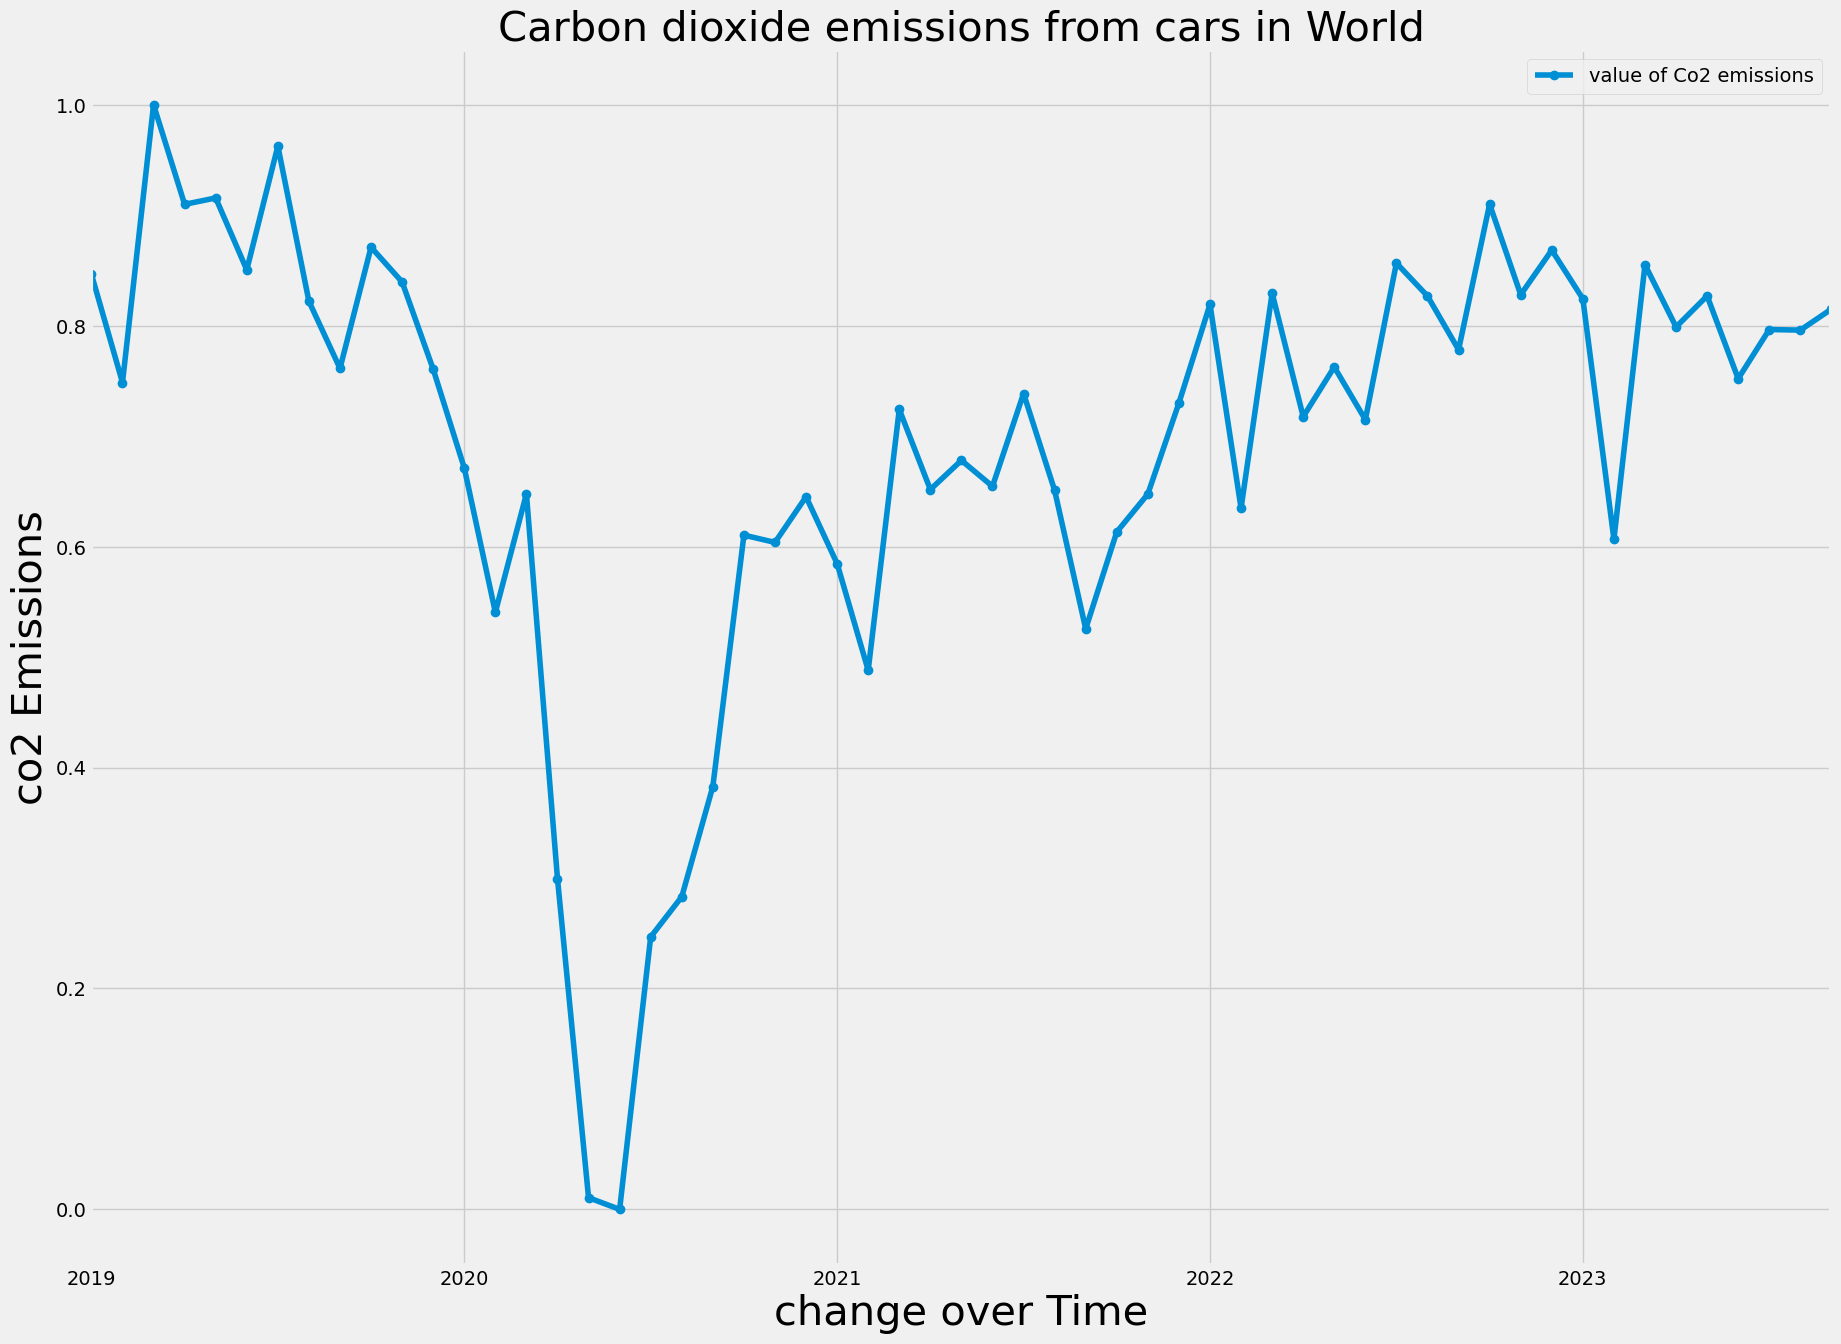

In [7]:
df[["value of Co2 emissions"]].plot(figsize=(20, 15), marker="o")
plt.title("Carbon dioxide emissions from cars in World", fontsize=30)
plt.xlabel("change over Time", fontsize=30)
plt.ylabel("co2 Emissions", fontsize=30)

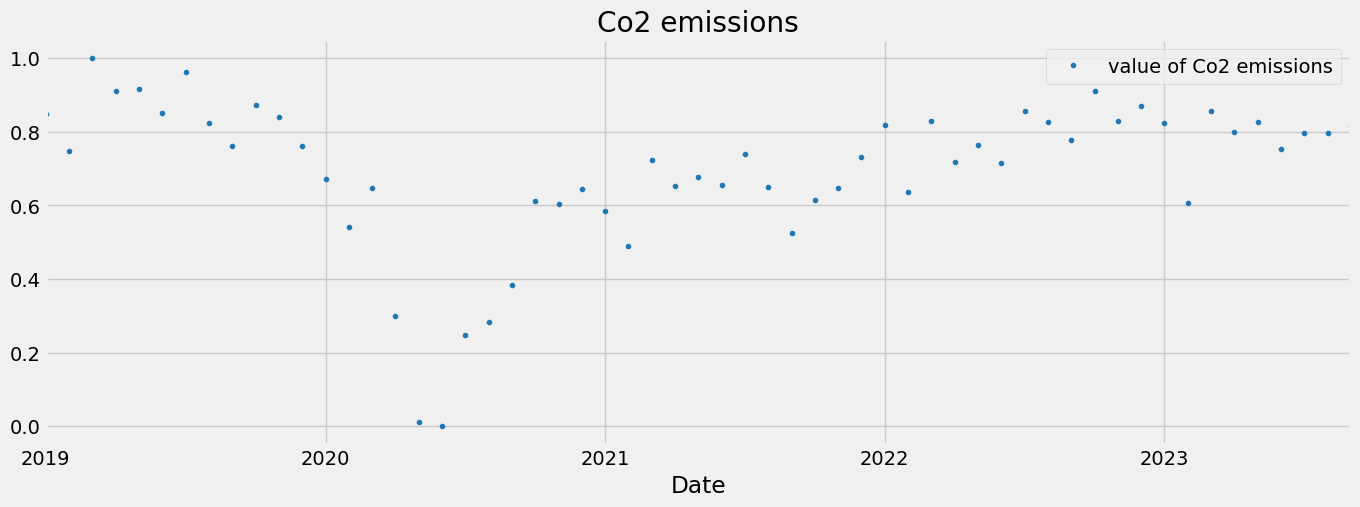

In [8]:
df.plot(style=".", figsize=(15, 5), color=color_pal[0], title="Co2 emissions")
plt.show()

#### Adding COVID-19 Indicator


In [9]:
start_date = pd.to_datetime("2020-04-01")
end_date = pd.to_datetime("2020-08-01")

df["covid"] = [1 if start_date <= x <= end_date else 0 for x in df.index]

In [10]:
df.head(20)

,value of Co2 emissions,covid
Date,,
2019-01-01,0.846596,0
2019-02-01,0.748577,0
2019-03-01,1.000000,0
2019-04-01,0.909883,0
2019-05-01,0.915687,0
2019-06-01,0.850577,0
2019-07-01,0.962634,0
2019-08-01,0.822123,0
2019-09-01,0.761373,0


#### Data Train / Test Split and visualization


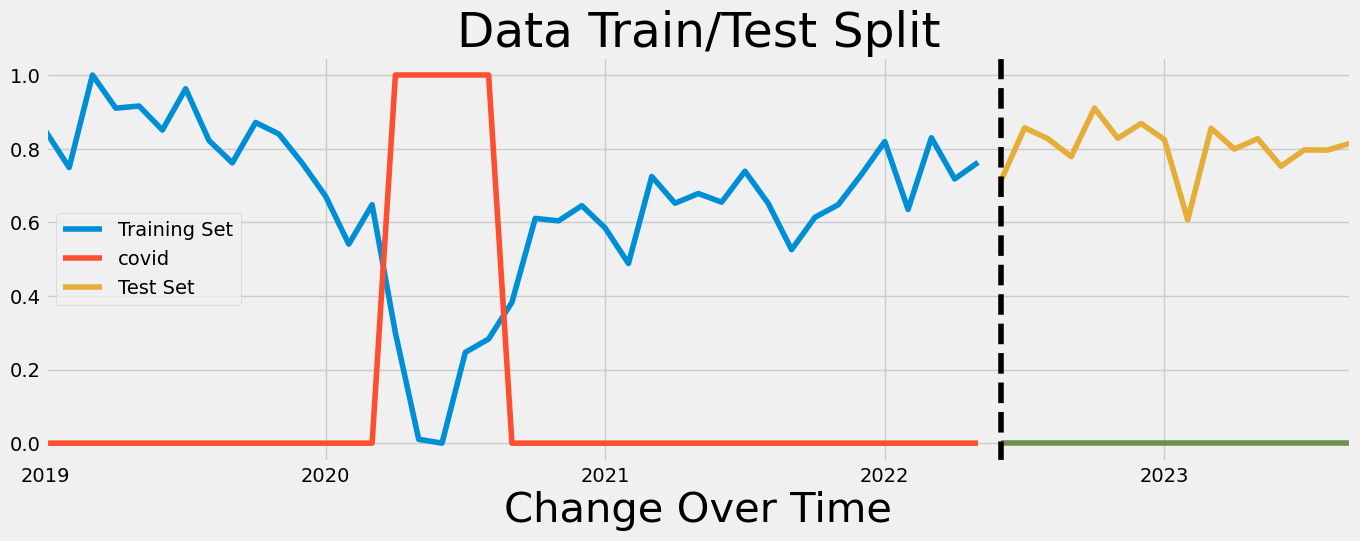

In [11]:
train = df.loc[df.index < "2022-06-01"]
test = df.loc[df.index >= "2022-06-01"]

_, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label="Training Set")
test.plot(ax=ax, label="Test Set")
ax.axvline("2022-06-01", color="black", ls="--")
ax.legend(["Training Set", "covid", "Test Set"])
plt.title("Data Train/Test Split", fontsize=35)
plt.xlabel("Change Over Time", fontsize=30)
plt.show()

#### Creating Time Series Features


In [12]:
def create_features(Temp_df):
    """
    Create time series features based on time series index.
    """
    Temp_df = Temp_df.copy()
    Temp_df["quarter"] = Temp_df.index.quarter
    Temp_df["month"] = Temp_df.index.month
    Temp_df["year"] = Temp_df.index.year
    return Temp_df

In [13]:
df = create_features(df)
df

,value of Co2 emissions,covid,quarter,month,year
Date,,,,,
2019-01-01,0.846596,0,1,1,2019
2019-02-01,0.748577,0,1,2,2019
2019-03-01,1.000000,0,1,3,2019
2019-04-01,0.909883,0,2,4,2019
2019-05-01,0.915687,0,2,5,2019
2019-06-01,0.850577,0,2,6,2019
2019-07-01,0.962634,0,3,7,2019
2019-08-01,0.822123,0,3,8,2019
2019-09-01,0.761373,0,3,9,2019


#### Visualizing the Change in Co2 Emissions over Months


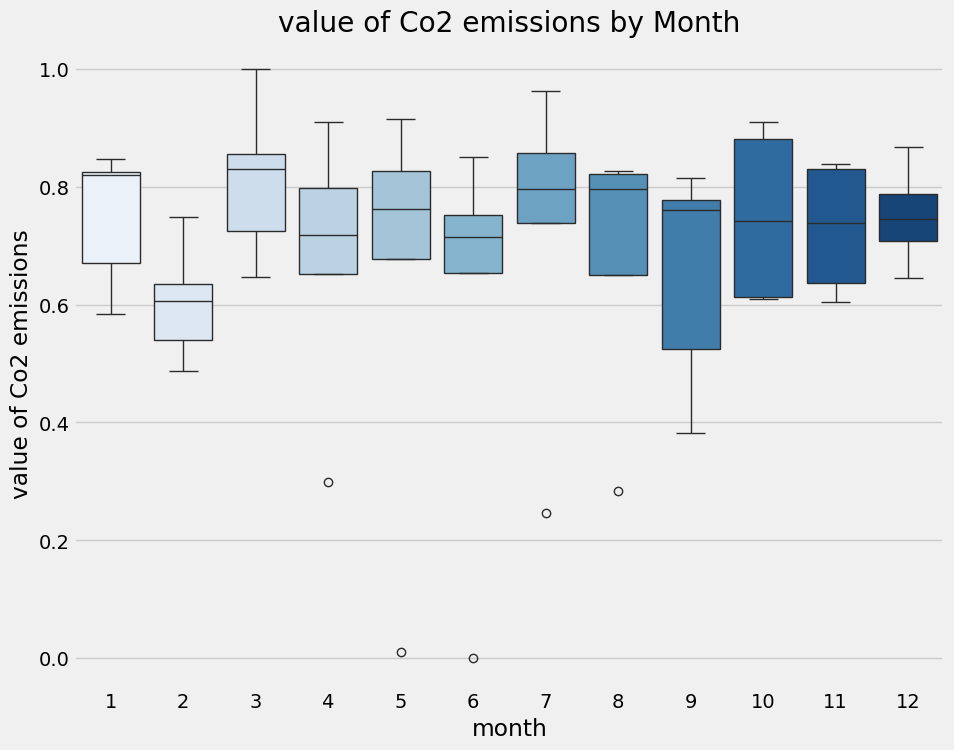

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="month", y="value of Co2 emissions", palette="Blues")
ax.set_title("value of Co2 emissions by Month")
plt.show()

#### Visualize the Change in Co2 Emissions over Years


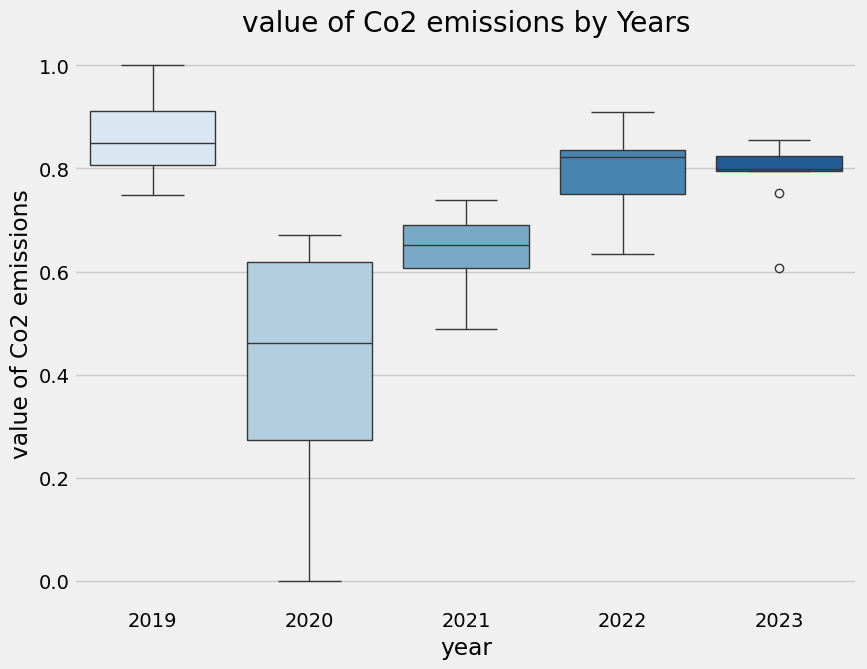

In [15]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(data=df, x=df.year, y="value of Co2 emissions", palette="Blues")
ax.set_title("value of Co2 emissions by Years")
plt.show()

#### Visualize the Change in Co2 Emissions over Quarters


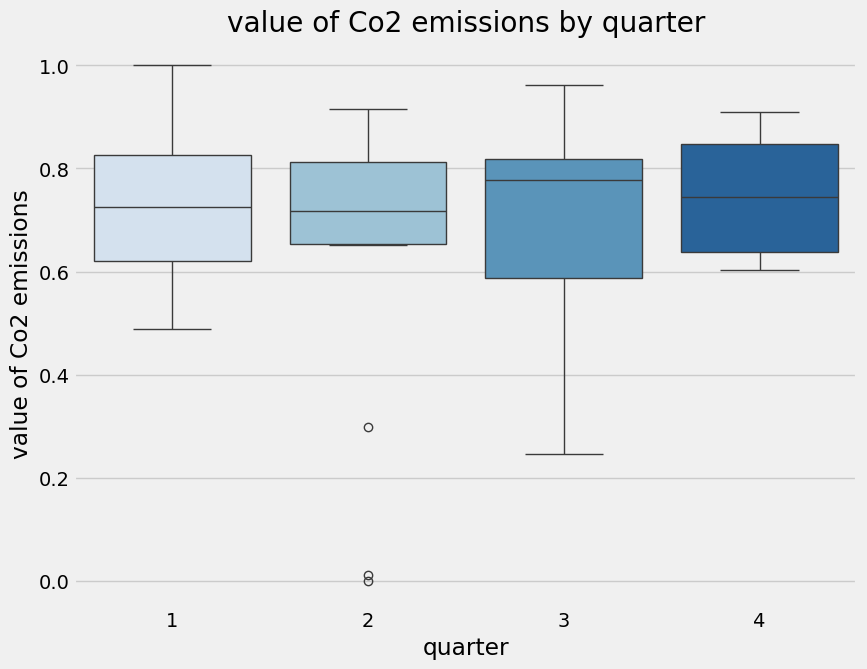

In [16]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(data=df, x=df.quarter, y="value of Co2 emissions", palette="Blues")
ax.set_title("value of Co2 emissions by quarter")
plt.show()

#### Correlation Matrix to indicate the correlation between the variables


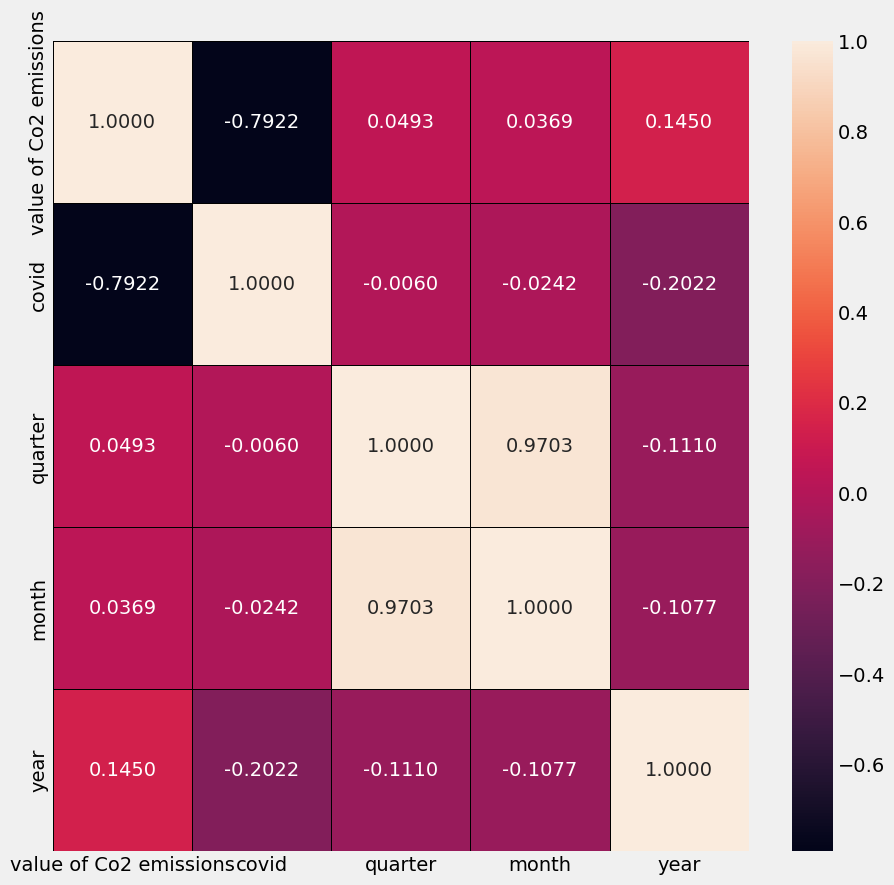

In [17]:
# Create a heatmap to visualize the correlation matrix of the DataFrame
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt=".4f", ax=ax)
plt.show()

## Model Training and Hyperparameter Tuning


In [18]:
train = create_features(train)
test = create_features(test)

FEATURES = ["quarter", "month", "year", "covid"]
TARGET = "value of Co2 emissions"

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

#### Model XGBoost


In [19]:
reg = xgb.XGBRegressor()

#### Hyperparameter Tuning using Grid Search Optimization


In [20]:
param_grid = {
    "n_estimators": [1000, 2000],
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.1, 0.01],
    "base_score": [0.5, 1, 0.6],
}
grid_search = GridSearchCV(
    estimator=reg, param_grid=param_grid, cv=3, scoring="neg_mean_squared_error"
)

In [21]:
grid_search.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=False,
)

# Get best hyperparameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

#### Best Hyperparameters


In [22]:
print("Best Hyperparameters:", best_params)
print(
    "Best Mean Squared Error:", -best_score
)  # Negative sign because of the way GridSearchCV uses scoring

# Optionally, you can fit the model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params)
# # best_model.fit(X, y)

Best Hyperparameters: {'base_score': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}
Best Mean Squared Error: 0.058341096416185824


In [25]:
reg = xgb.XGBRegressor(
    base_score=0.5,
    booster="gbtree",
    n_estimators=1000,
    early_stopping_rounds=50,
    objective="reg:linear",
    max_depth=4,
    learning_rate=0.1,
)

#### Model Fitting using XGBoost


In [26]:
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:0.24910	validation_1-rmse:0.29038


[100]	validation_0-rmse:0.01010	validation_1-rmse:0.09933
[200]	validation_0-rmse:0.00422	validation_1-rmse:0.09756
[202]	validation_0-rmse:0.00422	validation_1-rmse:0.09756


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

#### Model Evaluation


In [27]:
y_pred = reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.0756557845400429
Mean Squared Error: 0.00939861205465456
R-squared: -1.0498384858142944


#### Save the trained model


In [ ]:
# create pki for the model
with open("./models/XGB.pkl", "wb") as f:
    pickle.dump(reg, f)

#### Visualize Feature Importance


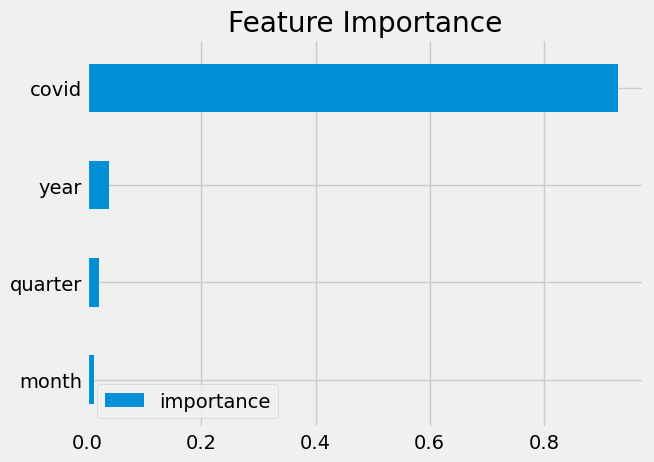

In [ ]:
fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["importance"]
)
fi.sort_values("importance").plot(kind="barh", title="Feature Importance")
plt.show()

#### Visualize Predictions and Actual Values


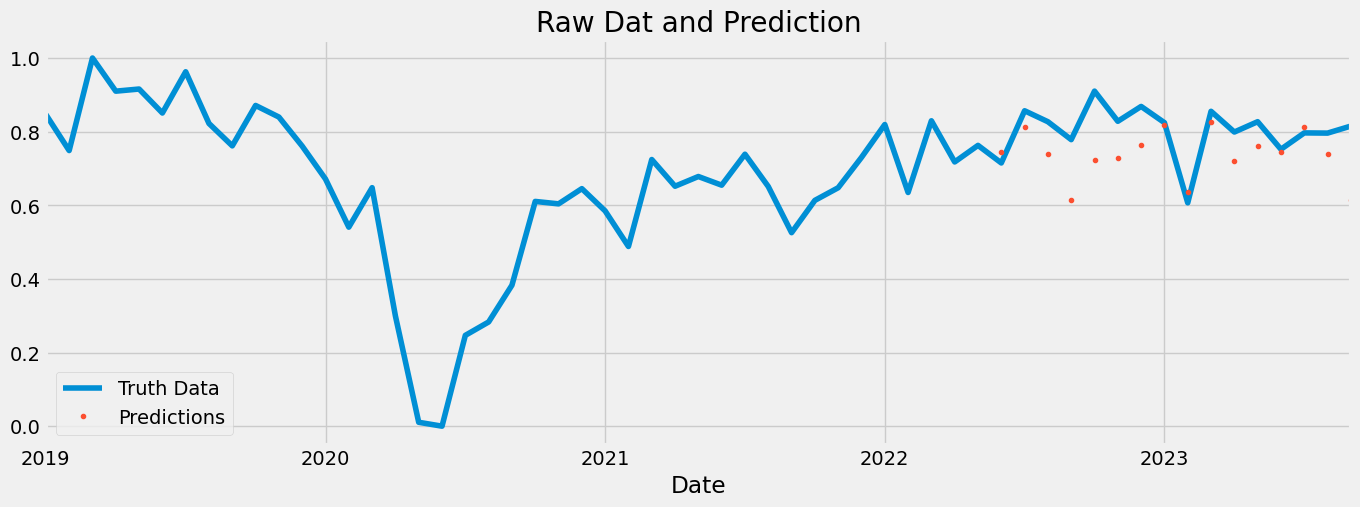

In [ ]:
test["prediction"] = reg.predict(X_test)
df = df.merge(test[["prediction"]], how="left", left_index=True, right_index=True)
ax = df[["value of Co2 emissions"]].plot(figsize=(15, 5))
df["prediction"].plot(ax=ax, style=".")
plt.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Dat and Prediction")
plt.show()

#### MSE Score


In [ ]:
score = np.sqrt(mean_squared_error(test["value of Co2 emissions"], test["prediction"]))
print(f"RMSE Score on Test set: {score:0.3f}")

RMSE Score on Test set: 0.097


#### Error Analysis - Top 10 Errors


In [ ]:
test["error"] = np.abs(test[TARGET] - test["prediction"])
test["date"] = test.index.date
test.groupby(["date"])["error"].mean().sort_values(ascending=False).head(10)

date
2023-09-01    0.201536
2022-10-01    0.187788
2022-09-01    0.164735
2022-12-01    0.104147
2022-11-01    0.100473
2022-08-01    0.087752
2023-04-01    0.079378
2023-05-01    0.065223
2023-08-01    0.056883
2022-07-01    0.044196
Name: error, dtype: float64

#### Model Comparison Plot using Mean Absolute Error 

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.01),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Support Vector Machine": SVR(kernel="linear"),
}

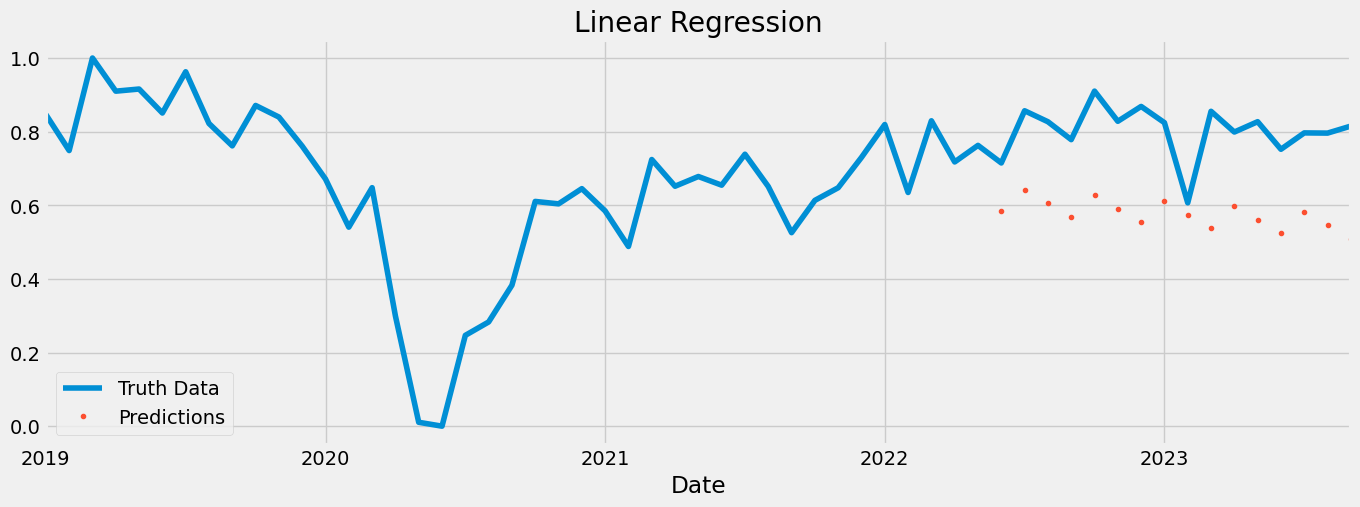

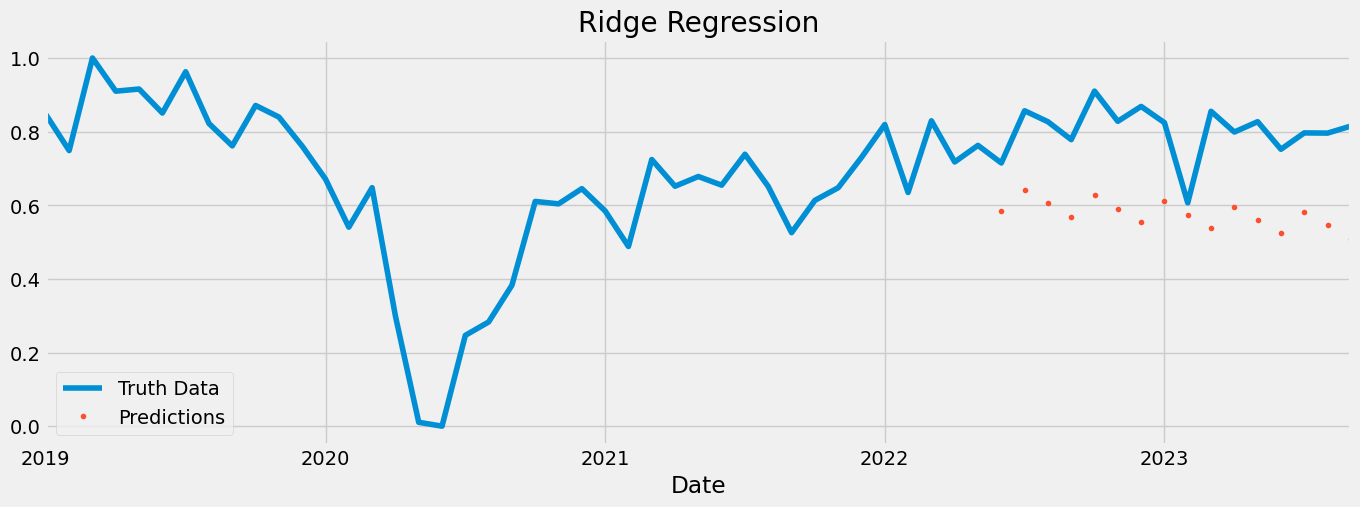

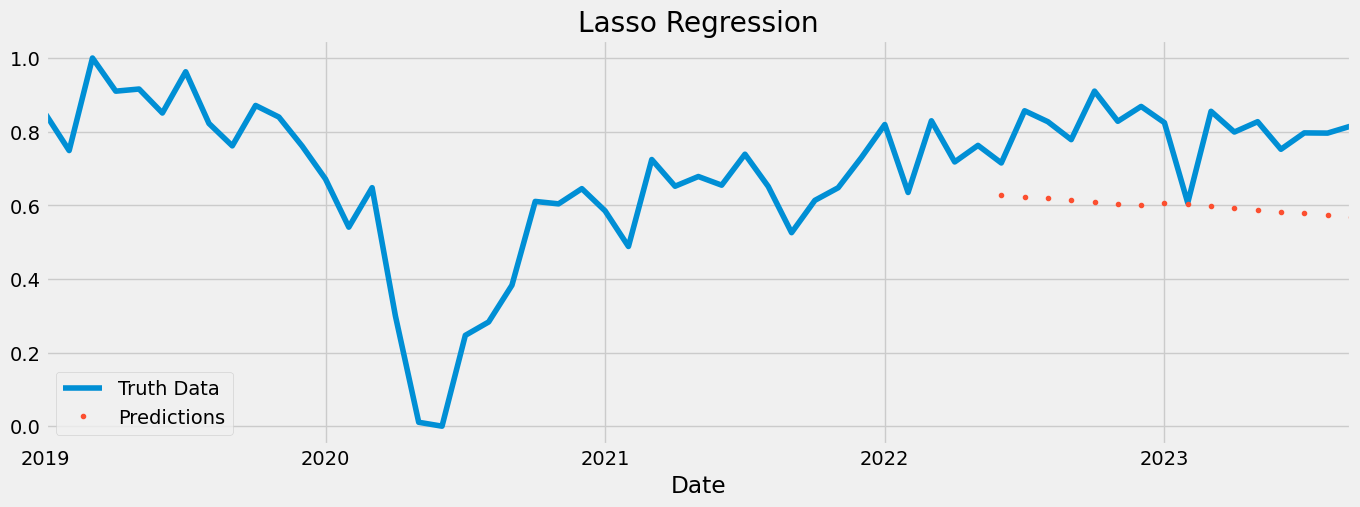

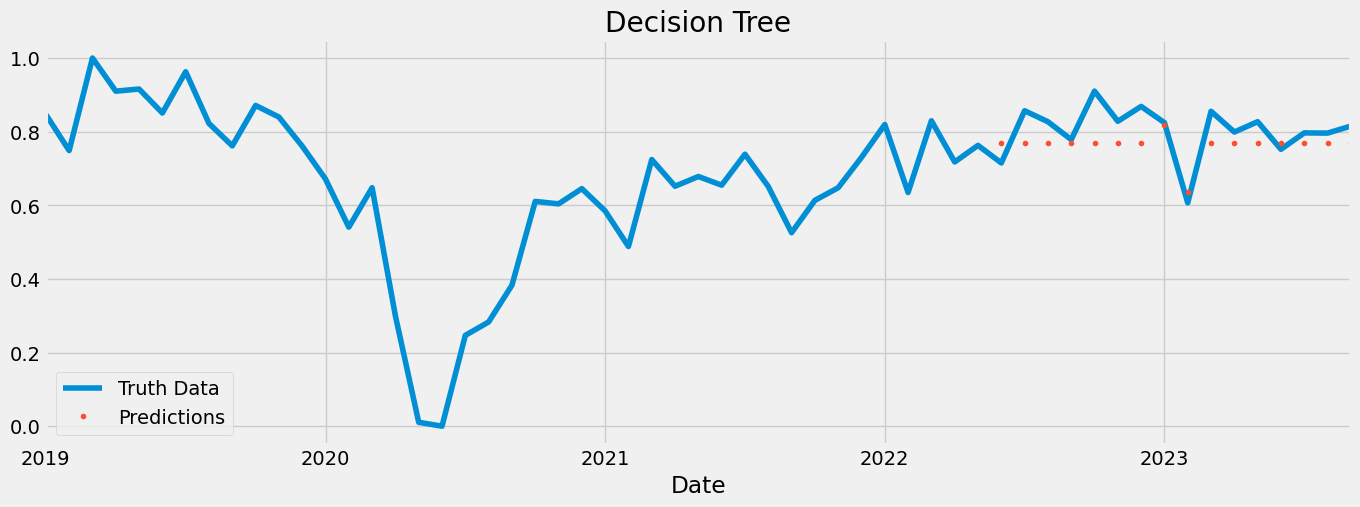

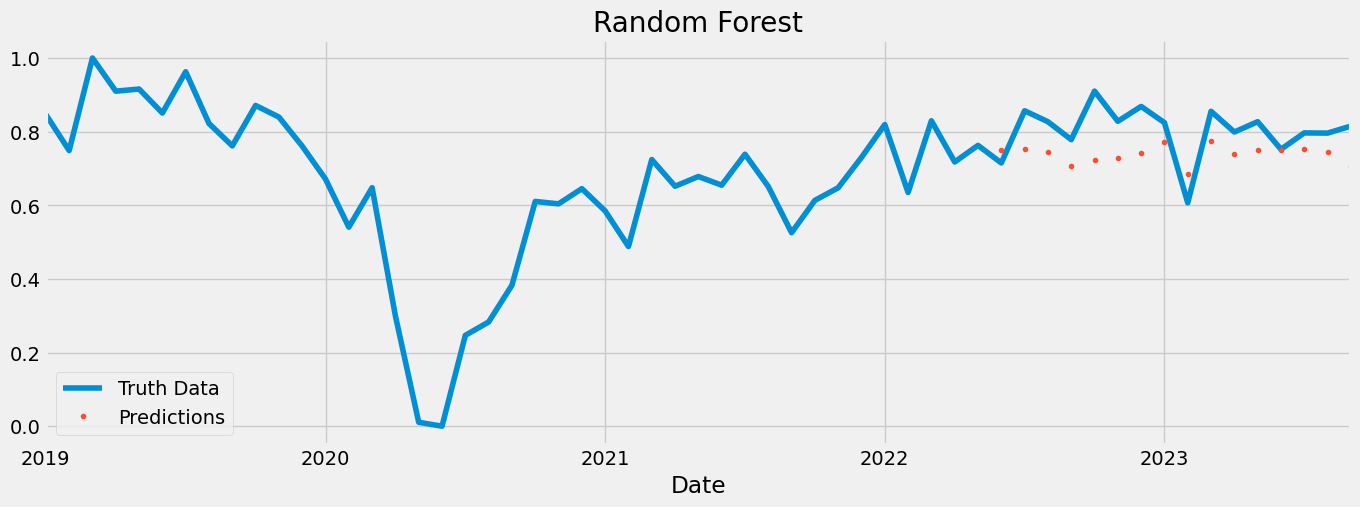

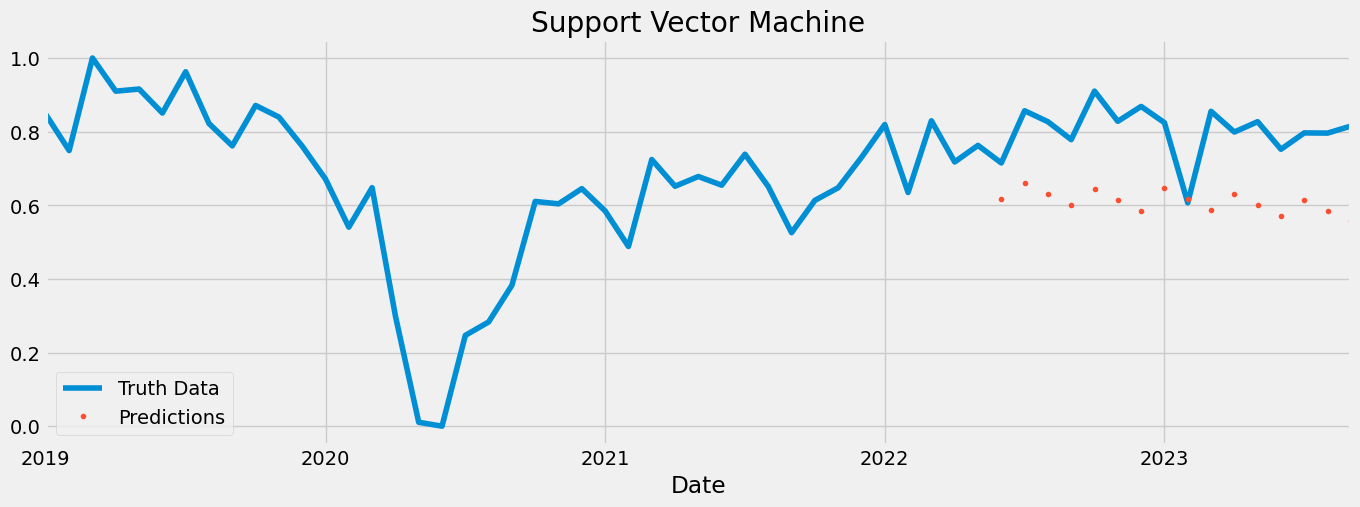

In [ ]:
dicDataFrame = {
    "Regression Name": [],
    "R2_score": [],
    "MSE": [],
    "MAE": [],
}

# Train and evaluate each classifier
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test[name] = y_pred
    MAE = mean_absolute_error(y_test, y_pred)
    # Calculate mean squared error
    MSE = mean_squared_error(y_test, y_pred)
    # Calculate R2 score
    R2 = r2_score(y_test, y_pred)

    test[name] = y_pred
    df = df.merge(test[[name]], how="left", left_index=True, right_index=True)
    ax = df[["value of Co2 emissions"]].plot(figsize=(15, 5))
    df[name].plot(ax=ax, style=".")
    plt.legend(["Truth Data", "Predictions"])
    ax.set_title(name)
    plt.show()

    dicDataFrame["Regression Name"].append(name)
    dicDataFrame["R2_score"].append(R2)
    dicDataFrame["MSE"].append(MSE)
    dicDataFrame["MAE"].append(MAE)


DataFrame = pd.DataFrame(dicDataFrame)

In [ ]:
DataFrame = DataFrame.sort_values(by="MSE")
DataFrame.style.format(precision=5, thousands=".", decimal=",").format_index(
    str.upper, axis=1
).relabel_index([0, 1, 2, 3, 4, 5], axis=0)

,REGRESSION NAME,R2_SCORE,MSE,MAE
0,Decision Tree,"0,14785","0,00391","0,05151"
1,Random Forest,"-0,73000","0,00793","0,07915"
2,Support Vector Machine,"-8,18545","0,04212","0,19447"
3,Lasso Regression,"-9,16299","0,04660","0,20426"
4,Linear Regression,"-11,30931","0,05644","0,22738"
5,Ridge Regression,"-11,31066","0,05645","0,22740"


#### Model Comparison Plot using Mean Squared Error

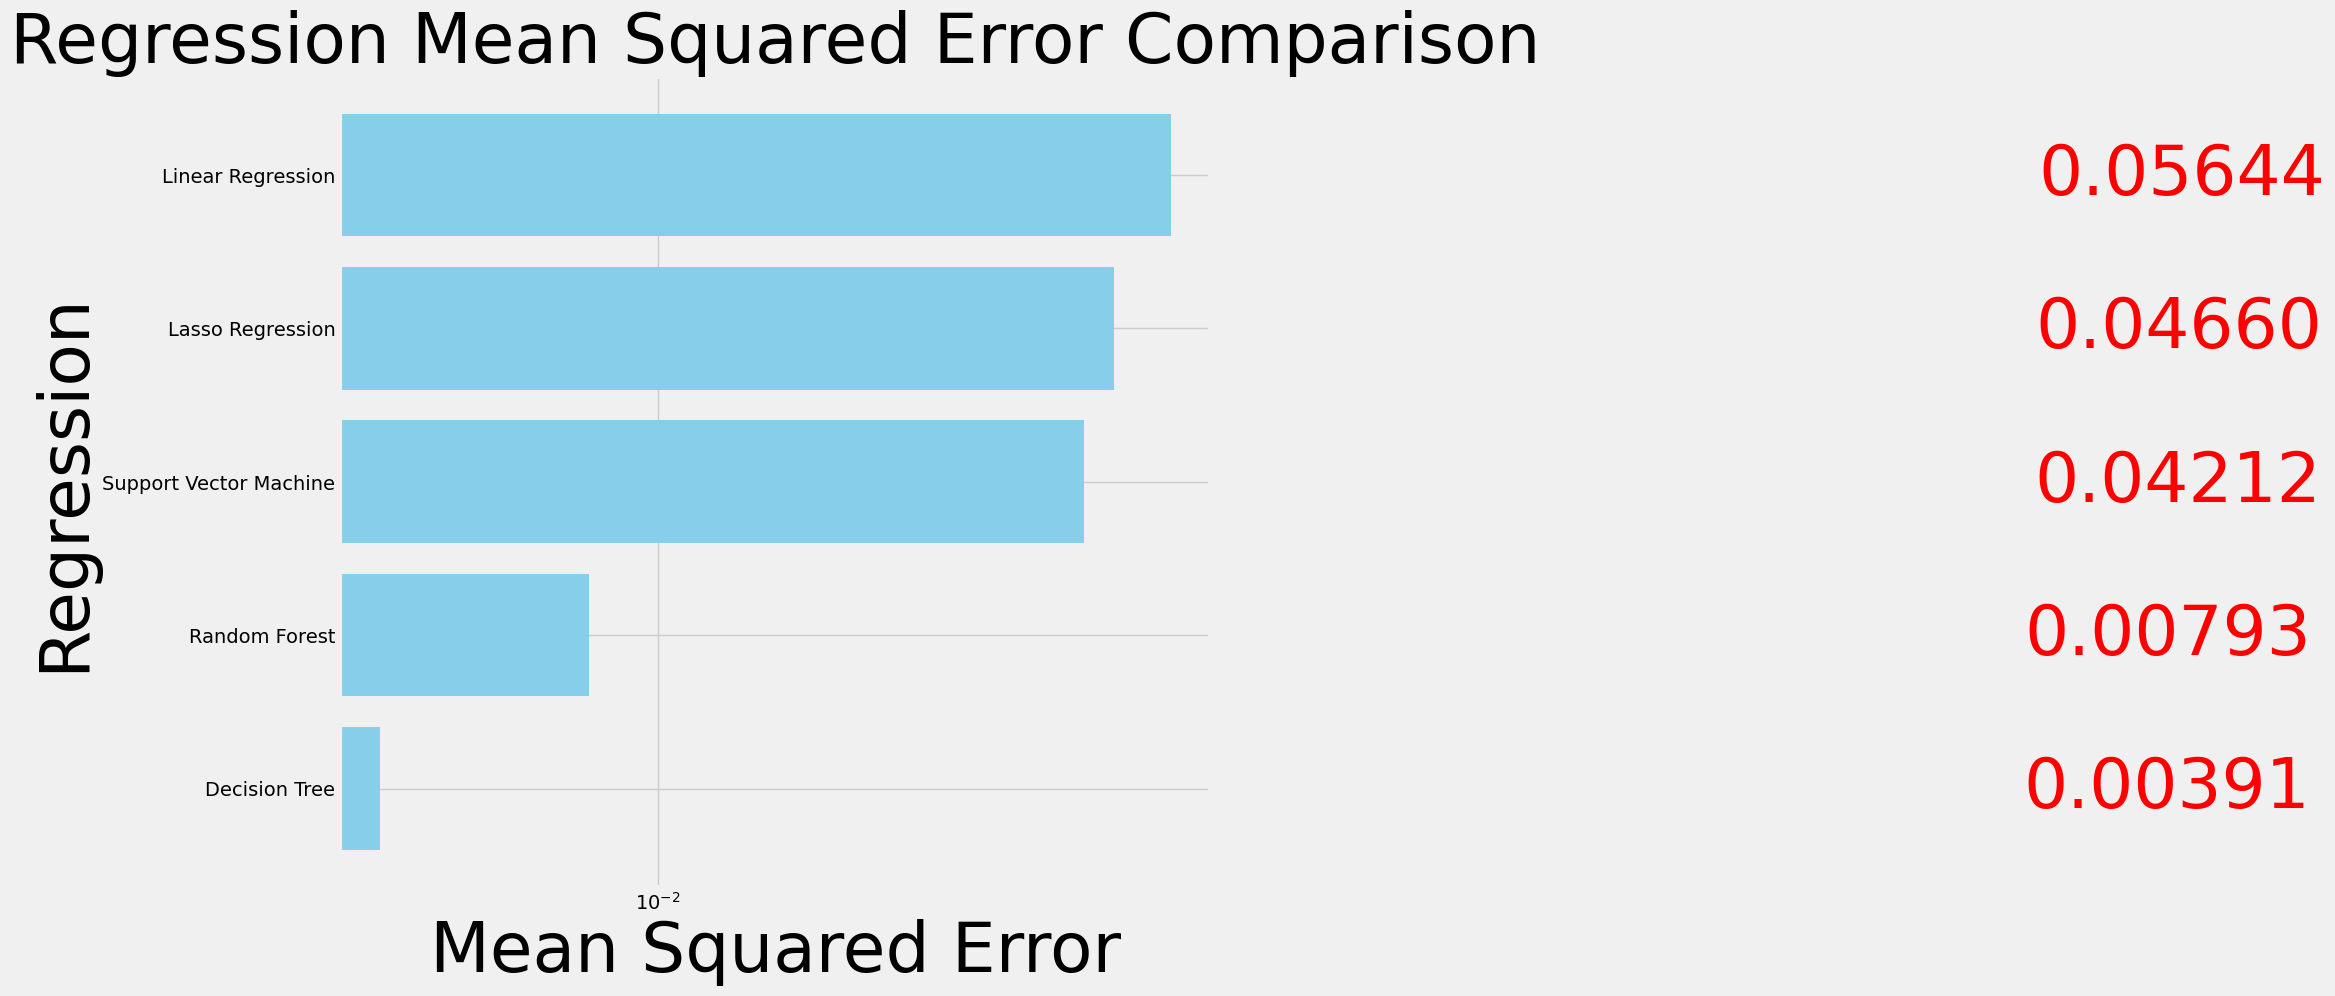

In [ ]:
plt.figure(figsize=(10, 10))  # Adjust the figsize here
bars = plt.barh(
    DataFrame["Regression Name"][:-1], DataFrame["MSE"][0:-1], color="skyblue"
)

# Add labels and title
plt.xlabel("Mean Squared Error",fontdict={'fontsize': 50})
plt.ylabel("Regression", fontdict={'fontsize': 50})
plt.title("Regression Mean Squared Error Comparison" , fontdict={'fontsize': 50})

# Add accuracy values to the bars
for bar in bars:
    plt.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.5f}",
        va="center",fontdict={'fontsize': 50, 'color': 'Red'}
    )

# Set logarithmic scale for y-axis
plt.gca().set_xscale("log")

# Show the plot
plt.tight_layout()
plt.show()

#### Predicting Future Values using Decision Tree

In [ ]:
def range_month(end_date):
    # Assuming you have a DataFrame 'df' with a datetime index
    # For demonstration, let's create a sample DataFrame
    dates = pd.date_range(start="2023-09-01", end=end_date, freq="MS")
    Temp_df = pd.DataFrame(dates, index=dates)

    # print(Temp_df)
    return Temp_df

In [ ]:
def plot_graph(input_value):
    Temp_df = create_features(range_month(input_value))
    Temp_df["covid"] = 0
    Temp_df["y predict"] = models["Decision Tree"].predict(
        Temp_df[["quarter", "month", "year", "covid"]]
    )

    Start_Date = "2019-01-01"
    x_values = pd.date_range(start=Start_Date, end=end_date, freq="MS")

    plt.figure(figsize=(20, 15))

    plt.plot(df.index, df["value of Co2 emissions"], label="Orgin")  # Plot dataset 1
    plt.plot(Temp_df.index, Temp_df["y predict"], label="prediction")  # Plot dataset 2

    # Add labels and legend
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Comparison of Two Datasets")
    plt.legend()
    # Show plot
    plt.show()

#### Create input widget and submit button

In [ ]:
# Function to handle button click event
def handle_submit(sender):
    input_value = str(text.value)
    plot_graph(input_value)

#### Display input widget and submit button

In [ ]:
# Create input widget
text = widgets.Text(description="Input value:")

# Create submit button
button = widgets.Button(description="Plot Graph")
button.on_click(handle_submit)

# Display widgets
display(text)
display(button)

Text(value='', description='Input value:')

Button(description='Plot Graph', style=ButtonStyle())

#### Save Models 

In [ ]:
for model_name, model in models.items():
    # add _ to model name
    model_name = model_name.replace(" ", "_")

    # save model
    with open(f"./models/{model_name}.pkl", "wb") as f:
        pickle.dump(model, f)